In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [2]:
df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df.index

DatetimeIndex(['2018-10-08', '2018-10-05', '2018-10-04', '2018-10-03',
               '2018-10-01', '2018-09-28', '2018-09-27', '2018-09-26',
               '2018-09-25', '2018-09-24',
               ...
               '2013-10-22', '2013-10-21', '2013-10-18', '2013-10-17',
               '2013-10-15', '2013-10-14', '2013-10-11', '2013-10-10',
               '2013-10-09', '2013-10-08'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)

In [4]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

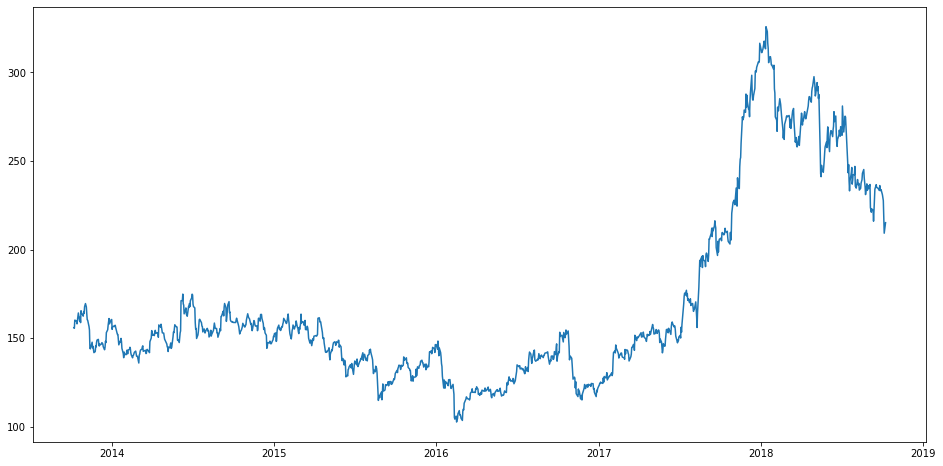

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [6]:
df.sort_index(ascending=True,axis=0,inplace = True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79


In [7]:
df1 = df[['Date','Close']].copy()
df1

,Date,Close
Date,,
2013-10-08,2013-10-08,155.80
2013-10-09,2013-10-09,155.55
2013-10-10,2013-10-10,160.15
2013-10-11,2013-10-11,160.05
2013-10-14,2013-10-14,159.45
...,...,...
2018-10-01,2018-10-01,230.90
2018-10-03,2018-10-03,227.60
2018-10-04,2018-10-04,218.20


In [8]:
df1.drop("Date",axis=1,inplace=True)
df1

,Close
Date,
2013-10-08,155.80
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.90
2018-10-03,227.60
2018-10-04,218.20


In [9]:
data = df1.values

In [10]:
train_data=data[0:988,:]
valid_data=data[988:,:]

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [12]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [13]:
x_train_data,len(y_train_data)

([array([0.23823398, 0.2371134 , 0.25773196, 0.25728373, 0.25459435,
         0.24831914, 0.2660242 , 0.27588525, 0.2552667 , 0.26535186,
         0.25145675, 0.28148812, 0.27431645, 0.27162707, 0.26781712,
         0.27947109, 0.27498879, 0.29157329, 0.29964142, 0.29112506,
         0.27297176, 0.25862842, 0.25750784, 0.2415957 , 0.23263111,
         0.18668758, 0.18511878, 0.20192739, 0.18780816, 0.19139399,
         0.18377409, 0.17548185, 0.17817122, 0.19206634, 0.19004931,
         0.20170327, 0.20730614, 0.20909906, 0.19789332, 0.19229045,
         0.19722098, 0.19520394, 0.19744509, 0.20080681, 0.19878978,
         0.19766921, 0.19049753, 0.18287763, 0.18870462, 0.20416853,
         0.20103093, 0.22613178, 0.23330345, 0.2447333 , 0.26176602,
         0.24831914, 0.25616316, 0.25907665, 0.25930076, 0.23442403]),
  array([0.2371134 , 0.25773196, 0.25728373, 0.25459435, 0.24831914,
         0.2660242 , 0.27588525, 0.2552667 , 0.26535186, 0.25145675,
         0.28148812, 0.27431645,

In [14]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data.shape[0],x_train_data.shape[1]

(928, 60)

In [15]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))
x_train_data.shape[0],x_train_data.shape[1],x_train_data.shape[2]

(928, 60, 1)

In [16]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [17]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=10,batch_size=1,verbose=2)

Epoch 1/10
928/928 - 23s - loss: 0.0010
Epoch 2/10
928/928 - 19s - loss: 4.6541e-04
Epoch 3/10
928/928 - 18s - loss: 4.0295e-04
Epoch 4/10
928/928 - 18s - loss: 2.7002e-04
Epoch 5/10
928/928 - 17s - loss: 2.4534e-04
Epoch 6/10
928/928 - 17s - loss: 2.2014e-04
Epoch 7/10
928/928 - 19s - loss: 2.6041e-04
Epoch 8/10
928/928 - 22s - loss: 2.3476e-04
Epoch 9/10
928/928 - 20s - loss: 2.4121e-04
Epoch 10/10
928/928 - 21s - loss: 2.3766e-04


In [18]:
inputs_data=df1[len(df1)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [19]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [20]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

In [21]:
lstm_model.save("saved_lstm_model.h5")

<ipython-input-26-a3695cd51fc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=closing_price.copy()


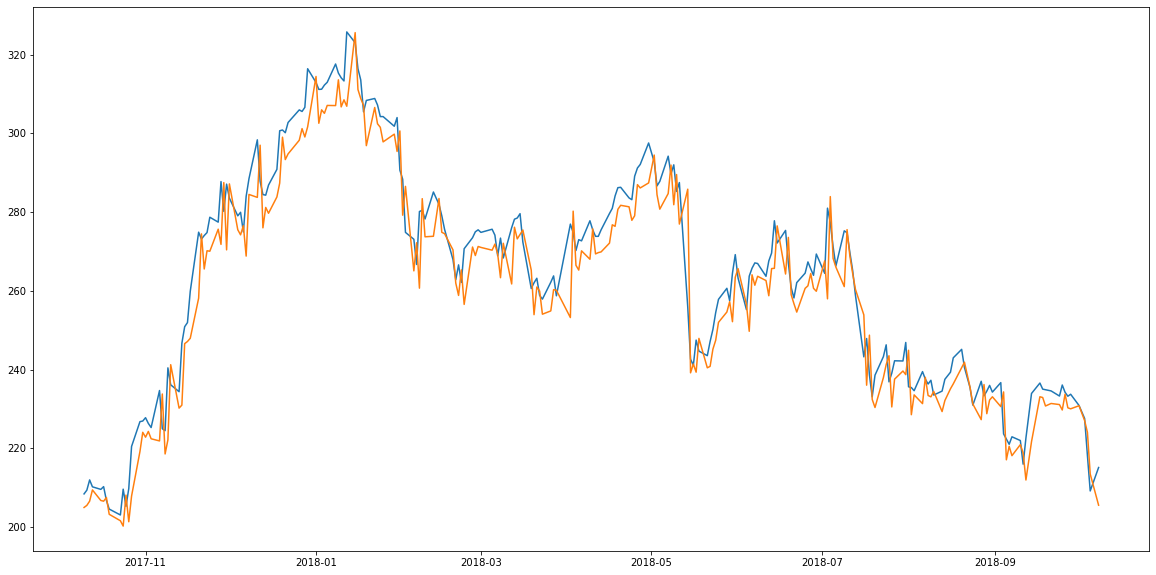

In [26]:
train_data=df1[:988]
valid_data=df1[988:]
valid_data['Predictions']=closing_price.copy()
# plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [23]:
temp=pd.read_csv("stock_data.csv")
temp.loc[temp['Stock'] == 'AAPL']

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0,AAPL
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0,AAPL
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0,AAPL
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0,AAPL


In [24]:
temp["Date"]=pd.to_datetime(temp.Date,format="%Y-%m-%d")
temp.index=temp['Date']
temp.index

DatetimeIndex(['1984-09-07', '1984-09-10', '1984-09-11', '1984-09-12',
               '1984-09-13', '1984-09-14', '1984-09-17', '1984-09-18',
               '1984-09-19', '1984-09-20',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=19586, freq=None)